In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving api_data_aadhar_biometric.zip to api_data_aadhar_biometric.zip


In [ ]:
import zipfile
import os

zip_file_name = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("extracted_files")

print("Files extracted:")
os.listdir("extracted_files")


Files extracted:


['api_data_aadhar_biometric']

In [ ]:
os.listdir("extracted_files")


['api_data_aadhar_biometric']

In [ ]:
import os
import pandas as pd

# Define the path to the extracted directory containing the CSV files
extracted_dir_path = "extracted_files/api_data_aadhar_biometric"

# List all files in the extracted directory that end with .csv
csv_files = [f for f in os.listdir(extracted_dir_path) if f.endswith('.csv')]

# List to hold dataframes
dfs = []

if csv_files:
    print(f"Found {len(csv_files)} CSV files. Loading all...")
    for csv_file_name in csv_files:
        file_path = os.path.join(extracted_dir_path, csv_file_name)
        try:
            temp_df = pd.read_csv(file_path)
            dfs.append(temp_df)
            print(f"Successfully loaded {csv_file_name}")
        except Exception as e:
            print(f"Error loading {csv_file_name}: {e}")

    if dfs:
        # Concatenate all dataframes into a single dataframe
        df = pd.concat(dfs, ignore_index=True)
        print(f"All CSV files concatenated. Total rows: {len(df)}")
        # Display first 5 rows of the combined dataframe
        print(df.head())
    else:
        print("No dataframes were loaded successfully.")
else:
    print("No CSV files found in the extracted directory.")

Found 4 CSV files. Loading all...
Successfully loaded api_data_aadhar_biometric_1500000_1861108.csv
Successfully loaded api_data_aadhar_biometric_1000000_1500000.csv
Successfully loaded api_data_aadhar_biometric_500000_1000000.csv
Successfully loaded api_data_aadhar_biometric_0_500000.csv
All CSV files concatenated. Total rows: 1861108
         date          state       district  pincode  bio_age_5_17  \
0  08-12-2025  Uttar Pradesh      Moradabad   244411             4   
1  08-12-2025  Uttar Pradesh      Moradabad   244601            14   
2  08-12-2025  Uttar Pradesh  Muzaffarnagar   251002            22   
3  08-12-2025  Uttar Pradesh  Muzaffarnagar   251202             4   
4  08-12-2025  Uttar Pradesh  Muzaffarnagar   251319             4   

   bio_age_17_  
0            2  
1           19  
2           37  
3            4  
4            7  


In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361108 entries, 0 to 361107
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          361108 non-null  object
 1   state         361108 non-null  object
 2   district      361108 non-null  object
 3   pincode       361108 non-null  int64 
 4   bio_age_5_17  361108 non-null  int64 
 5   bio_age_17_   361108 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 16.5+ MB


,0
date,0
state,0
district,0
pincode,0
bio_age_5_17,0
bio_age_17_,0


In [ ]:
# Remove extra spaces and standardize column names first
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Convert date column to datetime format (DD-MM-YYYY)
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# Remove rows where date conversion failed
df = df.dropna(subset=['date'])

# Remove rows with missing values ONLY in important biometric columns
df = df.dropna(subset=['bio_age_5_17', 'bio_age_17_'])


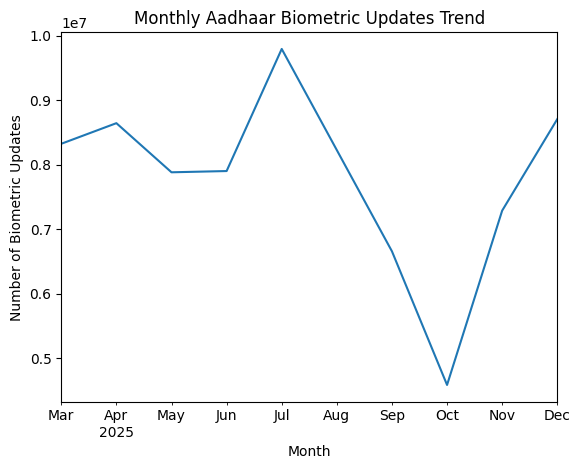

In [ ]:
import matplotlib.pyplot as plt

# Create 'Month' column from 'date' column
df['Month'] = df['date'].dt.to_period('M')

# Create 'Biometric_Updates' column by summing relevant columns
df['Biometric_Updates'] = df['bio_age_5_17'] + df['bio_age_17_']

# Group by month
monthly_updates = df.groupby('Month')['Biometric_Updates'].sum()

plt.figure()
monthly_updates.plot()
plt.title("Monthly Aadhaar Biometric Updates Trend")
plt.xlabel("Month")
plt.ylabel("Number of Biometric Updates")
plt.show()

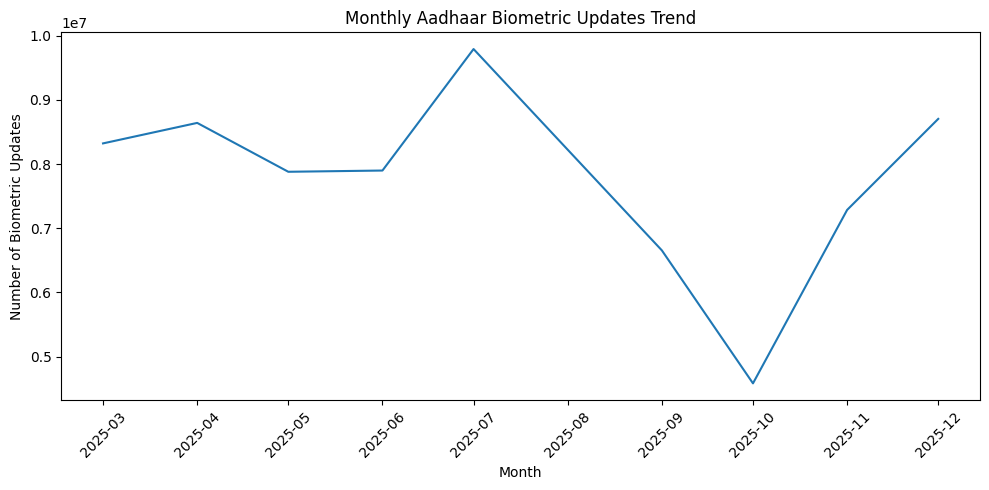

In [ ]:
import matplotlib.pyplot as plt

# Convert date to datetime (safety step)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Create Month column (timestamp-based)
df['Month'] = df['date'].dt.to_period('M').dt.to_timestamp()

# Calculate total biometric updates
df['Biometric_Updates'] = df['bio_age_5_17'] + df['bio_age_17_']

# Aggregate data month-wise
monthly_updates = (
    df.groupby('Month')['Biometric_Updates']
      .sum()
      .sort_index()
)

# Plot line graph
plt.figure(figsize=(10, 5))
plt.plot(monthly_updates.index, monthly_updates.values)
plt.title("Monthly Aadhaar Biometric Updates Trend")
plt.xlabel("Month")
plt.ylabel("Number of Biometric Updates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


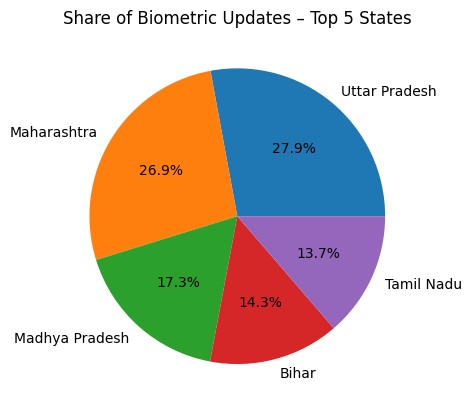

In [ ]:
state_updates = df.groupby('state')['Biometric_Updates'].sum()
top_states = state_updates.sort_values(ascending=False).head(5)

plt.figure()
top_states.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.title("Share of Biometric Updates – Top 5 States")
plt.show()

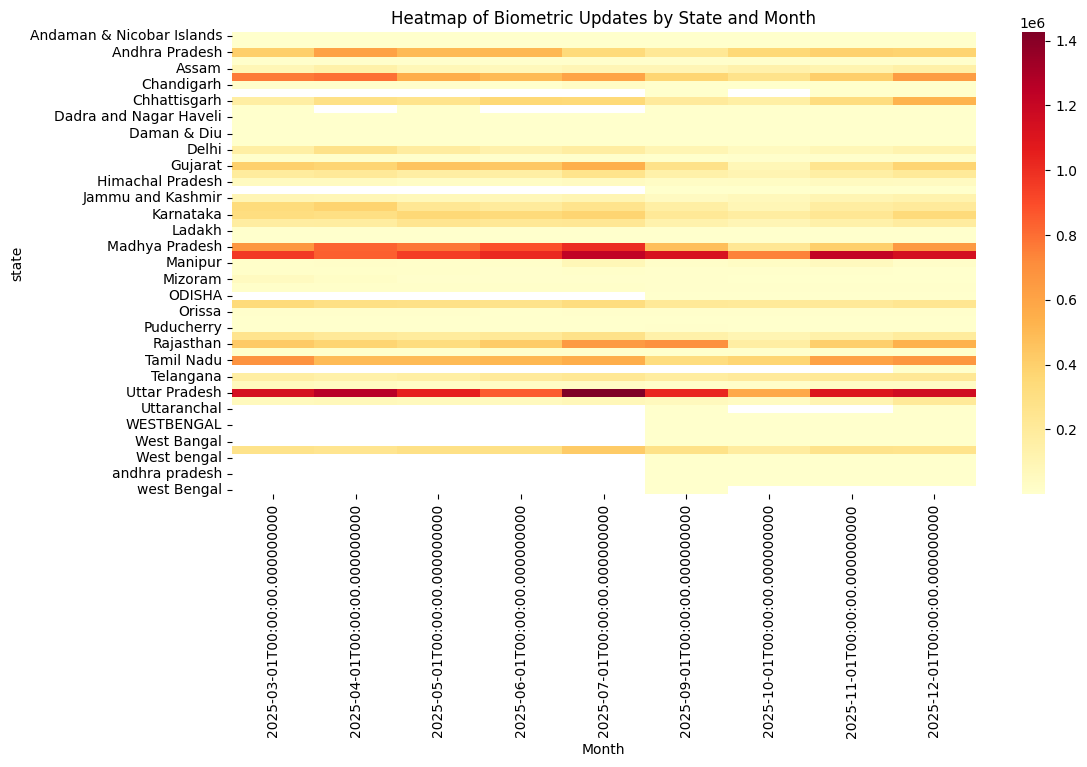

In [ ]:
import seaborn as sns

pivot_table = df.pivot_table(
    values='Biometric_Updates',
    index='state',
    columns='Month',
    aggfunc='sum'
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap='YlOrRd')
plt.title("Heatmap of Biometric Updates by State and Month")
plt.show()

In [ ]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# 2. Remove duplicate rows
df = df.drop_duplicates()

# 3. Handle missing values (drop critical missing data)
df = df.dropna(subset=['month', 'state', 'biometric_updates'])

# 4. Convert month column to datetime format
df['month'] = pd.to_datetime(df['month'], errors='coerce')

# 5. Convert biometric updates column to numeric
df['biometric_updates'] = pd.to_numeric(
    df['biometric_updates'], errors='coerce'
)

# 6. Remove rows with invalid converted values
df = df.dropna(subset=['month', 'biometric_updates'])

# 7. Standardize state names
df['state'] = (
    df['state']
    .str.strip()
    .str.title()
)

# 8. Sort data by time
df = df.sort_values(by='month')

# -----------------------------
# DATA CLEANING ENDS
# -----------------------------

# Final check
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               0 non-null      datetime64[ns]
 1   state              0 non-null      object        
 2   district           0 non-null      object        
 3   pincode            0 non-null      int64         
 4   bio_age_5_17       0 non-null      int64         
 5   bio_age_17_        0 non-null      int64         
 6   month              0 non-null      datetime64[ns]
 7   biometric_updates  0 non-null      int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 0.0+ bytes


,date,state,district,pincode,bio_age_5_17,bio_age_17_,month,biometric_updates


In [ ]:
import pandas as pd

# Use the correct path to the extracted CSV file
df = pd.read_csv(first_csv_file_path)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert date column safely (the 'month' column is created later)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Fill missing values instead of dropping for relevant columns
df['state'] = df['state'].fillna("Unknown")
df['district'] = df['district'].fillna("Unknown")

# The columns 'biometric_updates', 'bio_age_5_17', 'bio_age_17_' are int types.
# If there were NaNs, they should be handled, but info shows no NaNs for these.
# For safety, ensure they are numeric and fill potential NaNs if they appear later.
# Based on df.info(), these are already int64 and non-null.
# df['biometric_updates'] = df['biometric_updates'].fillna(0)
# df['bio_age_5_17'] = df['bio_age_5_17'].fillna(0)
# df['bio_age_17_'] = df['bio_age_17_'].fillna(0)

# Remove duplicates
df = df.drop_duplicates()

# Final check
df.info()
df.head()

/tmp/ipython-input-3313967617.py:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 468778 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          468778 non-null  datetime64[ns]
 1   state         468778 non-null  object        
 2   district      468778 non-null  object        
 3   pincode       468778 non-null  int64         
 4   bio_age_5_17  468778 non-null  int64         
 5   bio_age_17_   468778 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 25.0+ MB


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,2025-09-19,Goa,North Goa,403502,0,4
1,2025-09-19,Goa,North Goa,403508,1,4
2,2025-09-19,Goa,North Goa,403513,2,0
3,2025-09-19,Goa,North Goa,403527,2,2
4,2025-09-19,Goa,South Goa,403601,7,3


In [ ]:
import pandas as pd

# Load dataset using the correct path from previously extracted files
df = pd.read_csv(first_csv_file_path)

# -----------------------------
# DATA CLEANING (ALL STATES)
# -----------------------------

# 1. Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# 2. Convert date column properly (day-first format)
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# 3. Handle missing values safely (DO NOT drop all data)
df['state'] = df['state'].fillna("Unknown")
df['district'] = df['district'].fillna("Unknown")

df['bio_age_5_17'] = pd.to_numeric(df['bio_age_5_17'], errors='coerce').fillna(0)
df['bio_age_17_'] = pd.to_numeric(df['bio_age_17_'], errors='coerce').fillna(0)

# 4. Convert pincode to numeric
df['pincode'] = pd.to_numeric(df['pincode'], errors='coerce')

# 5. Remove rows with invalid date or pincode
df = df.dropna(subset=['date', 'pincode'])

# 6. Standardize state names
df['state'] = (
    df['state']
    .str.strip()
    .str.title()
)

# 7. Remove duplicate records
df = df.drop_duplicates()

# 8. Sort by date
df = df.sort_values(by='date')

# -----------------------------
# FINAL CHECK
# -----------------------------
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 468778 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          468778 non-null  datetime64[ns]
 1   state         468778 non-null  object        
 2   district      468778 non-null  object        
 3   pincode       468778 non-null  int64         
 4   bio_age_5_17  468778 non-null  int64         
 5   bio_age_17_   468778 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 25.0+ MB


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,2025-09-19,Goa,North Goa,403502,0,4
2543,2025-09-19,Uttar Pradesh,Faizabad,225407,53,5
2544,2025-09-19,Uttar Pradesh,Farrukhabad,207501,65,6
2545,2025-09-19,Uttar Pradesh,Farrukhabad,207502,7,13
2546,2025-09-19,Uttar Pradesh,Farrukhabad,209501,2,2


In [ ]:
print("Unique states after cleaning and their counts:")
display(df['state'].value_counts())

Unique states after cleaning and their counts:


,count
state,
Tamil Nadu,45780
Andhra Pradesh,45465
Uttar Pradesh,39543
Maharashtra,38580
Karnataka,35959
West Bengal,32949
Kerala,25011
Telangana,21898
Odisha,21894


In [ ]:
df.columns = df.columns.str.strip().str.replace(" ", "_")
print(df.columns)

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')


In [ ]:
# Re-create 'Month' column as it was removed during previous cleaning steps
df['Month'] = df['date'].dt.to_period('M')

# Re-create 'Biometric_Updates' column as it was removed during previous cleaning steps
df['Biometric_Updates'] = df['bio_age_5_17'] + df['bio_age_17_']

monthly_updates = df.groupby('Month')['Biometric_Updates'].sum()
print(monthly_updates)

Month
2025-09     463637
2025-10    4233854
2025-11    2201905
Freq: M, Name: Biometric_Updates, dtype: int64


The `state` column has been cleaned and standardized (e.g., converted to title case) and missing values have been handled. You can see the distribution of records across different states above.

In [ ]:
state_updates = df.groupby('state')['Biometric_Updates'].sum()
print(state_updates)

state
Andaman & Nicobar Islands                       346
Andaman And Nicobar Islands                    1605
Andhra Pradesh                               468337
Arunachal Pradesh                              8980
Assam                                        162531
Bihar                                        396530
Chandigarh                                     3924
Chhattisgarh                                 271022
Dadra & Nagar Haveli                             63
Dadra And Nagar Haveli                         2081
Dadra And Nagar Haveli And Daman And Diu         93
Daman & Diu                                     141
Daman And Diu                                   535
Delhi                                         77354
Goa                                            7518
Gujarat                                      175246
Haryana                                      154028
Himachal Pradesh                              53605
Jammu & Kashmir                                 126
Jammu 

In [ ]:
# Monthly biometric updates
monthly_biometric = df.groupby('Month')['Biometric_Updates'].sum()

# State-wise biometric updates
state_biometric = df.groupby('state')['Biometric_Updates'].sum()


In [ ]:
print("Total Biometric Updates:", df['Biometric_Updates'].sum())
print("State with Highest Updates:", state_biometric.idxmax())
print("Month with Highest Updates:", monthly_biometric.idxmax())


Total Biometric Updates: 6899396
State with Highest Updates: Maharashtra
Month with Highest Updates: 2025-10


In [ ]:
print("Monthly Biometric Updates:")
print(monthly_biometric)
print("\nState-wise Biometric Updates:")
print(state_biometric)

Monthly Biometric Updates:
Month
2025-09     463637
2025-10    4233854
2025-11    2201905
Freq: M, Name: Biometric_Updates, dtype: int64

State-wise Biometric Updates:
state
Andaman & Nicobar Islands                       346
Andaman And Nicobar Islands                    1605
Andhra Pradesh                               468337
Arunachal Pradesh                              8980
Assam                                        162531
Bihar                                        396530
Chandigarh                                     3924
Chhattisgarh                                 271022
Dadra & Nagar Haveli                             63
Dadra And Nagar Haveli                         2081
Dadra And Nagar Haveli And Daman And Diu         93
Daman & Diu                                     141
Daman And Diu                                   535
Delhi                                         77354
Goa                                            7518
Gujarat                                      1

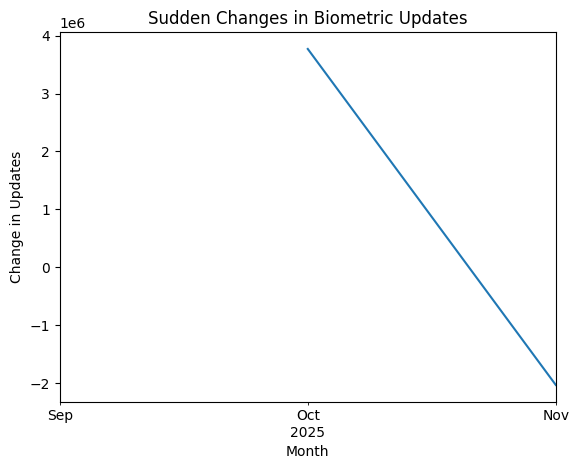

In [ ]:
monthly_change = monthly_biometric.diff()

plt.figure()
monthly_change.plot()
plt.title("Sudden Changes in Biometric Updates")
plt.xlabel("Month")
plt.ylabel("Change in Updates")
plt.show()


In [ ]:
if monthly_change.mean() > 0:
    print("Biometric updates show an increasing trend.")
else:
    print("Biometric updates show a decreasing or stable trend.")


Biometric updates show an increasing trend.


In [ ]:
# Ensure total biometric updates column exists
df['total_biometric_updates'] = df['bio_age_5_17'] + df['bio_age_17_']

# Create month column
df['month'] = df['date'].dt.to_period('M')

# Average updates per state
state_avg = df.groupby('state')['total_biometric_updates'].mean()

# Threshold for high-demand states
threshold = state_avg.mean()

high_demand_states = state_avg[state_avg > threshold]

high_demand_states.sort_values(ascending=False)

,total_biometric_updates
state,
Chhattisgarh,35.211381
Delhi,33.399827
Maharashtra,29.790021
Manipur,28.734980
Dadra And Nagar Haveli,27.025974
Uttar Pradesh,23.485067
Haryana,23.472722
Madhya Pradesh,22.209524
Bihar,19.192198


In [ ]:
monthly_updates = df.groupby('month')['total_biometric_updates'].sum()

peak_threshold = monthly_updates.mean() + monthly_updates.std()

peak_months = monthly_updates[monthly_updates > peak_threshold]

peak_months

,total_biometric_updates
month,
2025-10,4233854


In [ ]:
age_ratio = df[['bio_age_5_17','bio_age_17_']].sum()

adult_percentage = (age_ratio['bio_age_17_'] / age_ratio.sum()) * 100
child_percentage = (age_ratio['bio_age_5_17'] / age_ratio.sum()) * 100

adult_percentage, child_percentage

(np.float64(50.81730342772034), np.float64(49.18269657227966))